In [26]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("viktor-cikojevic/three_d_seg")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })


In [27]:
df.head()   

,summary,config,name
0,"{'_runtime': 7471.68595290184, 'crude_f1': 0, ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x5-bs32-llr-3....
1,"{'lr-AdamW': 0.00031622776601683794, 'crude_f1...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x4-bs32-llr-3....
2,"{'epoch': 0, 'surface_dice': 0.865718722343444...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....
3,"{'threshold': 0.019999999552965164, 'f1_score'...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....
4,"{'epoch': 0, '_wandb': {'runtime': 5195}, '_ru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....


In [28]:
group_names = []
for i in range(len(df)):
    try:
        group_name = df.config.iloc[i]['group_name']
        group_names.append(group_name)
    except:
        group_names.append('None')
    
df['group_name'] = group_names

In [29]:
df

,summary,config,name,group_name
0,"{'_runtime': 7471.68595290184, 'crude_f1': 0, ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x5-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
1,"{'lr-AdamW': 0.00031622776601683794, 'crude_f1...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x4-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
2,"{'epoch': 0, 'surface_dice': 0.865718722343444...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
3,"{'threshold': 0.019999999552965164, 'f1_score'...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
4,"{'epoch': 0, '_wandb': {'runtime': 5195}, '_ru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
...,...,...,...,...
69,"{'train_loss': 0.1076958104968071, '_wandb': {...","{'loss': [{'type': 'BCELoss', 'weight': 0.41},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
70,"{'f1_score': 0.9244391918182372, 'lr-AdamW': 0...","{'loss': [{'type': 'BCELoss', 'weight': 0.6100...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun
71,"{'_timestamp': 1703511911.8146243, '_wandb': {...","{'loss': [{'type': 'BCELoss', 'weight': 0.51},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-2....,smp_unet_r50_hyptun
72,"{'_wandb': {'runtime': 3706}, '_runtime': 3707...","{'loss': [{'type': 'BCELoss', 'weight': 0.01},...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_hyptun


In [30]:
df = df[df['group_name'] == 'smp_unet_r50_scan_crop_size_n_channels']
df

,summary,config,name,group_name
0,"{'_runtime': 7471.68595290184, 'crude_f1': 0, ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x5-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
1,"{'lr-AdamW': 0.00031622776601683794, 'crude_f1...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x4-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
2,"{'epoch': 0, 'surface_dice': 0.865718722343444...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
3,"{'threshold': 0.019999999552965164, 'f1_score'...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
4,"{'epoch': 0, '_wandb': {'runtime': 5195}, '_ru...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
5,"{'surface_dice': 0.8772937655448914, 'epoch': ...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c384x1-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
6,"{'epoch': 0, 'crude_f1': 0, 'lr-AdamW': 0.0003...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c256x1-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
7,"{'epoch': 0, 'lr-AdamW': 0.0003162277660168379...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c64x1-bs32-llr-3.5...,smp_unet_r50_scan_crop_size_n_channels
9,"{'_step': 1894, '_timestamp': 1703848300.29954...","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c192x3-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels
10,"{'_wandb': {'runtime': 4707}, 'train_loss': 0....","{'loss': [{'type': 'BCELoss', 'weight': 0.001}...",SMP(Unet_resnet50_imagenet)-c192x1-bs32-llr-3....,smp_unet_r50_scan_crop_size_n_channels


In [31]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    if not isinstance(d, (dict, list)):
        # Return immediately if d is neither a dictionary nor a list
        return {parent_key: d}

    for k, v in d.items() if isinstance(d, dict) else enumerate(d):
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                items.extend(flatten_dict(item, f"{new_key}{sep}{i}", sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


In [32]:
flat_configs = []
# loop over rows
for indx_row, row in df.iterrows():
    # Flatten the config   
    config = row['config']
    flat_config = flatten_dict(config)
    flat_configs.append(flat_config)

In [33]:
df = pd.DataFrame(flat_configs)
df.head()

,loss_0_type,loss_0_weight,loss_1_type,loss_1_weight,loss_2_type,loss_2_kwargs_smooth,loss_2_weight,loss_3_type,loss_3_kwargs_gamma,loss_3_weight,...,early_stopping_min_delta,batch_transform_kwargs_mixup_prob,batch_transform_kwargs_alpha_mixup,batch_transform_kwargs_cutmix_prob,batch_transform_kwargs_alpha_cutmix,experiment_name,quit_immediately,val_check_interval,apparent_batch_size,best_surface_dice
0,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.4,FocalLoss,2,0.6,...,0,0,0.4,0.3,0.4,SMP(Unet_resnet50_imagenet)-c384x5-bs32-llr-3....,False,40000,32,NaN
1,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.4,FocalLoss,2,0.6,...,0,0,0.4,0.3,0.4,SMP(Unet_resnet50_imagenet)-c384x4-bs32-llr-3....,False,40000,32,0.881508
2,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.4,FocalLoss,2,0.6,...,0,0,0.4,0.3,0.4,SMP(Unet_resnet50_imagenet)-c384x3-bs32-llr-3....,False,40000,32,0.876686
3,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.4,FocalLoss,2,0.6,...,0,0,0.4,0.3,0.4,SMP(Unet_resnet50_imagenet)-c384x2-bs32-llr-3....,False,40000,32,0.882567
4,BCELoss,0.001,MccLoss,0.001,DiceLoss,0.0001,0.4,FocalLoss,2,0.6,...,0,0,0.4,0.3,0.4,SMP(Unet_resnet50_imagenet)-c512x1-bs32-llr-3....,False,40000,32,0.877321


In [34]:
df = df[['dataset_kwargs_crop_size', 'dataset_kwargs_n_take_channels', 'best_surface_dice']]
# rename columns
df.columns = ['crop_size', 'n_take_channels', 'best_surface_dice']
df

,crop_size,n_take_channels,best_surface_dice
0,384,5,NaN
1,384,4,0.881508
2,384,3,0.876686
3,384,2,0.882567
4,512,1,0.877321
5,384,1,0.885373
6,256,1,0.881221
7,64,1,0.848643
8,192,3,0.873458
9,192,1,0.872801


Text(0, 0.5, 'best_surface_dice')

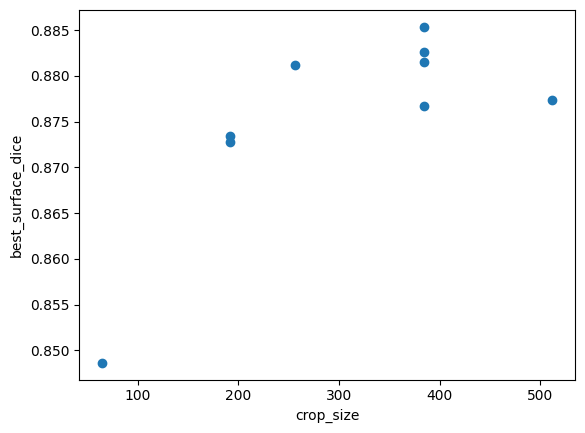

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df['crop_size'], df['best_surface_dice'])

plt.xlabel('crop_size')
plt.ylabel('best_surface_dice')



Text(0, 0.5, 'best_surface_dice')

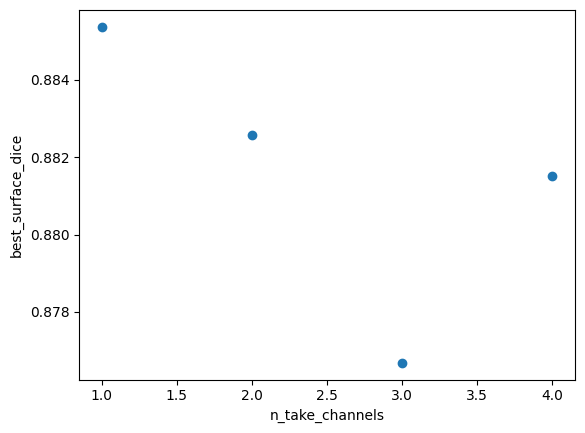

In [38]:
df = df[df['crop_size'] == 384].reset_index(drop=True)


plt.scatter(df['n_take_channels'], df['best_surface_dice'])

plt.xlabel('n_take_channels')
plt.ylabel('best_surface_dice')
